In [46]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# NFL Rushing Data from Pro Football Reference
nfl_rushing_2020 = pd.read_csv("Downloads/2020NFLRushingStats.csv")
nfl_rushing_2021 = pd.read_csv("Downloads/2021NFLRushingStats.csv")
nfl_rushing_2022 = pd.read_csv("Downloads/2022NFLRushingStats.csv")
nfl_rushing_2023 = pd.read_csv("Downloads/2023NFLRushingStats.csv")
nfl_rushing_2024 = pd.read_csv("Downloads/2024NFLRushingStats.csv")

nfl_rushing_2020['Season'] = "2020"
nfl_rushing_2021['Season'] = "2021"
nfl_rushing_2022['Season'] = "2022"
nfl_rushing_2023['Season'] = "2023"
nfl_rushing_2024['Season'] = "2024"

nfl_rushing = pd.concat([nfl_rushing_2020, nfl_rushing_2021, nfl_rushing_2022, nfl_rushing_2023, nfl_rushing_2024])
nfl_rushing.rename(columns={"Tm": "Team"}, inplace=True)
nfl_rushing.rename(columns={"Y/A": "YPC"}, inplace=True)
nfl_rushing['Season'] = nfl_rushing['Season'].astype(str)
nfl_rushing

,Rk,Team,G,Att,Yds,TD,Lng,YPC,Y/G,Fmb,EXP,Season
0,1,Baltimore Ravens,16,555,3071,24,72,5.5,191.9,25,116.76,2020
1,2,Tennessee Titans,16,521,2690,26,94,5.2,168.1,15,58.09,2020
2,3,Cleveland Browns,16,495,2374,21,59,4.8,148.4,23,33.06,2020
3,4,New England Patriots,16,502,2346,20,49,4.7,146.6,19,57.63,2020
4,5,Minnesota Vikings,16,468,2283,20,70,4.9,142.7,22,32.49,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
27,28,Seattle Seahawks,17,383,1627,17,51,4.2,95.7,21,-14.33,2024
28,29,Cleveland Browns,17,391,1608,8,66,4.1,94.6,20,-10.98,2024
29,30,Cincinnati Bengals,17,380,1574,11,47,4.1,92.6,24,-1.56,2024
30,31,New York Jets,17,363,1561,8,42,4.3,91.8,20,-3.44,2024


In [52]:
# NFL Standings Data from Pro Football Reference
nfl_standings_2020 = pd.read_csv("Downloads/2020NFLStandings.csv")
nfl_standings_2021 = pd.read_csv("Downloads/2021NFLStandings.csv")
nfl_standings_2022 = pd.read_csv("Downloads/2022NFLStandings.csv")
nfl_standings_2023 = pd.read_csv("Downloads/2023NFLStandings.csv")
nfl_standings_2024 = pd.read_csv("Downloads/2024NFLStandings.csv")

nfl_standings_2020['Season'] = "2020"
nfl_standings_2021['Season'] = "2021"
nfl_standings_2022['Season'] = "2022"
nfl_standings_2023['Season'] = "2023"
nfl_standings_2024['Season'] = "2024"

nfl_standings = pd.concat([nfl_standings_2020, nfl_standings_2021, nfl_standings_2022, nfl_standings_2023, nfl_standings_2024])
nfl_standings.rename(columns={"W-L%": "WL"}, inplace=True)
nfl_standings.rename(columns={"Tm": "Team"}, inplace=True)
nfl_standings["T"] = nfl_standings["T"].fillna(0)
nfl_standings["T"] = nfl_standings["T"].astype(int)
nfl_standings["Team"] = nfl_standings["Team"].str.replace("*", "", regex=False)
nfl_standings["Team"] = nfl_standings["Team"].str.replace("+", "", regex=False)
nfl_standings['Season'] = nfl_standings['Season'].astype(str)
nfl_standings

,Team,W,L,T,WL,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS,Season
0,Buffalo Bills,13,3,0,0.813,501,375,126,7.9,-0.2,7.7,7.1,0.6,2020
1,Miami Dolphins,10,6,0,0.625,404,338,66,4.1,-1.2,3.0,0.3,2.7,2020
2,New England Patriots,7,9,0,0.438,326,353,-27,-1.7,0.7,-1.0,-4.2,3.2,2020
3,New York Jets,2,14,0,0.125,243,457,-214,-13.4,1.9,-11.5,-8.7,-2.8,2020
4,Pittsburgh Steelers,12,4,0,0.750,416,312,104,6.5,-1.8,4.7,0.3,4.4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,New Orleans Saints,5,12,0,0.294,338,398,-60,-3.5,-0.6,-4.1,-3.6,-0.5,2024
28,Los Angeles Rams,10,7,0,0.588,367,386,-19,-1.1,1.1,-0.1,-0.6,0.6,2024
29,Seattle Seahawks,10,7,0,0.588,375,368,7,0.4,0.8,1.3,-0.3,1.5,2024
30,Arizona Cardinals,8,9,0,0.471,400,379,21,1.2,0.9,2.1,0.8,1.2,2024


In [54]:
# Extract necessary statistics from both dataframes
nfl_rushing_stats = nfl_rushing.groupby(['Team', 'Season'])[['Att', 'Yds', 'TD', 'YPC']].sum().reset_index()
nfl_rushing_stats

nfl_wpct = nfl_standings.groupby(['Team', 'Season'])[['WL']].sum().reset_index()
nfl_wpct

,Team,Season,Att,Yds,TD,YPC
0,Arizona Cardinals,2020,479,2237,22,4.7
1,Arizona Cardinals,2021,496,2076,23,4.2
2,Arizona Cardinals,2022,434,1873,15,4.3
3,Arizona Cardinals,2023,471,2365,17,5.0
4,Arizona Cardinals,2024,463,2451,18,5.3
...,...,...,...,...,...,...
155,Washington Commanders,2022,538,2143,9,4.0
156,Washington Commanders,2023,359,1592,14,4.4
157,Washington Commanders,2024,526,2619,25,5.0
158,Washington Football Team,2020,400,1611,18,4.0


,Team,Season,WL
0,Arizona Cardinals,2020,0.500
1,Arizona Cardinals,2021,0.647
2,Arizona Cardinals,2022,0.235
3,Arizona Cardinals,2023,0.235
4,Arizona Cardinals,2024,0.471
...,...,...,...
155,Washington Commanders,2022,0.500
156,Washington Commanders,2023,0.235
157,Washington Commanders,2024,0.706
158,Washington Football Team,2020,0.438


In [56]:
# Merge dataframes
nfl_rushing_wl = pd.merge(nfl_rushing_stats, nfl_wpct, on=["Team", "Season"])
nfl_rushing_wl

,Team,Season,Att,Yds,TD,YPC,WL
0,Arizona Cardinals,2020,479,2237,22,4.7,0.500
1,Arizona Cardinals,2021,496,2076,23,4.2,0.647
2,Arizona Cardinals,2022,434,1873,15,4.3,0.235
3,Arizona Cardinals,2023,471,2365,17,5.0,0.235
4,Arizona Cardinals,2024,463,2451,18,5.3,0.471
...,...,...,...,...,...,...,...
155,Washington Commanders,2022,538,2143,9,4.0,0.500
156,Washington Commanders,2023,359,1592,14,4.4,0.235
157,Washington Commanders,2024,526,2619,25,5.0,0.706
158,Washington Football Team,2020,400,1611,18,4.0,0.438


<Axes: xlabel='WL', ylabel='Att'>

Text(0.5, 1.0, 'Overall Win % vs. Rushing Attempts')

Text(0.5, 0, 'Overall Win %')

Text(0, 0.5, 'Rushing Attempts')

<Axes: xlabel='WL', ylabel='Yds'>

Text(0.5, 1.0, 'Overall Win % vs. Rushing Yards')

Text(0.5, 0, 'Overall Win %')

Text(0, 0.5, 'Rushing Yards')

<Axes: xlabel='WL', ylabel='TD'>

Text(0.5, 1.0, 'Overall Win % vs. Rushing Touchdowns')

Text(0.5, 0, 'Overall Win %')

Text(0, 0.5, 'Rushing Touchdowns')

<Axes: xlabel='WL', ylabel='YPC'>

Text(0.5, 1.0, 'Overall Win % vs. Yards Per Carry')

Text(0.5, 0, 'Overall Win %')

Text(0, 0.5, 'Yards Per Carry')

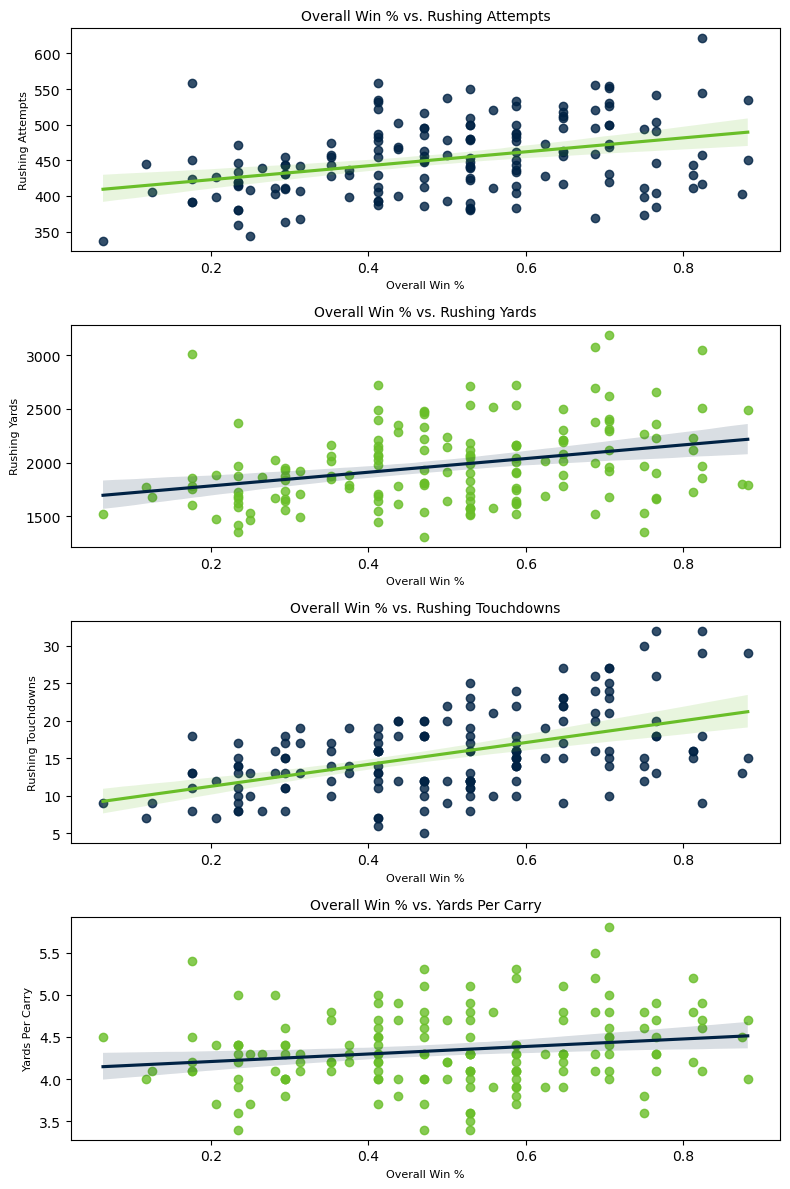

In [70]:
# Creating the plots
fig, axes = plt.subplots(4, 1, figsize=(8, 12))

# Plot for Overall Win % vs. Rushing Attempts
sns.regplot(x='WL', y='Att', data=nfl_rushing_wl, ax=axes[0], 
            scatter_kws={'color': '#002244'}, line_kws={'color': '#69BE28', 'linestyle': '-'})
axes[0].set_title("Overall Win % vs. Rushing Attempts", fontsize=10)
axes[0].set_xlabel("Overall Win %", fontsize=8)
axes[0].set_ylabel("Rushing Attempts", fontsize=8)

# Plot for Overall Win % vs. Rushing Yards
sns.regplot(x='WL', y='Yds', data=nfl_rushing_wl, ax=axes[1], 
            scatter_kws={'color': '#69BE28'}, line_kws={'color': '#002244', 'linestyle': '-'})
axes[1].set_title("Overall Win % vs. Rushing Yards", fontsize=10)
axes[1].set_xlabel("Overall Win %", fontsize=8)
axes[1].set_ylabel("Rushing Yards", fontsize=8)

# Plot for Overall Win % vs. Rushing Touchdowns
sns.regplot(x='WL', y='TD', data=nfl_rushing_wl, ax=axes[2], 
            scatter_kws={'color': '#002244'}, line_kws={'color': '#69BE28', 'linestyle': '-'})
axes[2].set_title("Overall Win % vs. Rushing Touchdowns", fontsize=10)
axes[2].set_xlabel("Overall Win %", fontsize=8)
axes[2].set_ylabel("Rushing Touchdowns", fontsize=8)

# Plot for Overall Win % vs. Yards Per Carry
sns.regplot(x='WL', y='YPC', data=nfl_rushing_wl, ax=axes[3], 
            scatter_kws={'color': '#69BE28'}, line_kws={'color': '#002244', 'linestyle': '-'})
axes[3].set_title("Overall Win % vs. Yards Per Carry", fontsize=10)
axes[3].set_xlabel("Overall Win %", fontsize=8)
axes[3].set_ylabel("Yards Per Carry", fontsize=8)

fig.tight_layout()
fig.savefig("nfl_standings_wl.pdf")

In [74]:
# Compute correlation coefficients for each chart
cc_att = nfl_rushing_wl['WL'].corr(nfl_rushing_wl['Att'])
cc_yds = nfl_rushing_wl['WL'].corr(nfl_rushing_wl['Yds'])
cc_td = nfl_rushing_wl['WL'].corr(nfl_rushing_wl['TD'])
cc_ypc = nfl_rushing_wl['WL'].corr(nfl_rushing_wl['YPC'])

print(f"Correlation between Win Percentage and Rushing Attempts: {cc_att:.4f}")
print(f"Correlation between Win Percentage and Rushing Yards: {cc_yds:.4f}")
print(f"Correlation between Win Percentage and Rushing Touchdowns: {cc_td:.4f}")
print(f"Correlation between Win Percentage and Yards Per Carry: {cc_ypc:.4f}")

Correlation between Win Percentage and Rushing Attempts: 0.3563
Correlation between Win Percentage and Rushing Yards: 0.3235
Correlation between Win Percentage and Rushing Touchdowns: 0.5016
Correlation between Win Percentage and Yards Per Carry: 0.1916
